<div style="text-align: center; font-size: 20px;"><b>Stats216v: Statistical Learning</b></div>

<br>
<div style="text-align: center">Stanford University</div>
<div style="text-align: center">Summer 2017</div>
<div style="text-align: center">Gyu-Ho Lee (<a href="mailto:gyuhox@gmail.com">gyuhox@gmail.com</a>)</div>

#### 4. Classification

In [147]:
LoadLibraries = function() {
    library(MASS)
    install.packages("ISLR")
    library(ISLR)
    print("Libraries have been loaded!")
}

LoadLibraries()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "Libraries have been loaded!"


In [148]:
names(Smarket)
head(Smarket[9])
contrasts(Smarket$Direction)
attach(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

Direction
Up
Up
Down
Up
Up
Up


,Up
Down,0
Up,1


The following objects are masked from Smarket (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 7):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 8):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 9):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 10):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


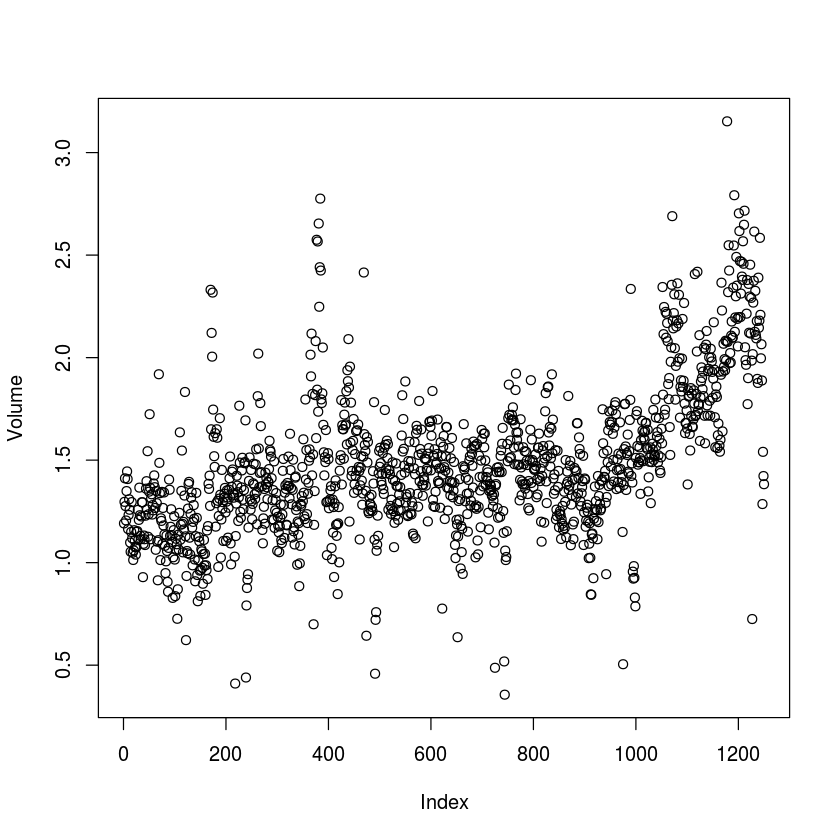

In [149]:
cor(Smarket[,-9])
plot(Volume)

##### Logistic Regression

In [150]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
             data=Smarket, family=binomial)

summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [151]:
summary(glm.fit)$coef
coef(glm.fit)

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [152]:
glm.probs = predict(glm.fit, type="response")

# probability that market going up
glm.probs[1:3]

# create a vector of 1,250 'Down's
glm.pred = rep("Down", 1250)

# transform to "Up" when probability of market increat > 0.5
glm.pred[glm.probs > .5] = "Up"

1         2         3 
0.5070841 0.4814679 0.4811388

In [153]:
table(glm.pred, Direction)
# fraction of days where prediction was correct
# (145+507)/1250
mean(glm.pred == Direction)
# training error rate
mean(glm.pred != Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

[1] 0.5216

[1] 0.4784

In [154]:
# training data
train = (Year < 2005)
Smarket.2005 = Smarket[!train,]
Direction.2005 = Direction[!train]
dim(Smarket.2005)

[1] 252   9

In [155]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Volume,
             data=Smarket, family=binomial, subset=train)
glm.probs = predict(glm.fit, Smarket.2005, type="response")
glm.pred = rep("Down", 252)
glm.pred[glm.probs > .5] = "Up"

summary(glm.fit)

table(glm.pred, Direction.2005)
mean(glm.pred == Direction.2005)
mean(glm.pred != Direction.2005)

Warning message in eval(expr, envir, enclos):
"non-integer #successes in a binomial glm!"


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket, weights = Volume, 
    subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9528  -1.3890   0.9792   1.3558   2.0610  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.29522    0.28995   1.018    0.309
Lag1        -0.04302    0.04200  -1.024    0.306
Lag2        -0.03621    0.04257  -0.850    0.395
Lag3         0.01099    0.04284   0.257    0.798
Lag4         0.01006    0.04310   0.233    0.815
Lag5        -0.01906    0.04257  -0.448    0.654
Volume      -0.18951    0.20085  -0.944    0.345

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1891.7  on 997  degrees of freedom
Residual deviance: 1888.7  on 991  degrees of freedom
AIC: 1757.7

Number of Fisher Scoring iterations: 3


        Direction.2005
glm.pred Down  Up
    Down   90 116
    Up     21  25

[1] 0.4563492

[1] 0.5436508

In [156]:
# remove not helpful variables
glm.fit = glm(Direction~Lag1+Lag2,
              data=Smarket, family=binomial, subset=train)
glm.probs = predict(glm.fit, Smarket.2005, type="response")
glm.pred = rep("Down", 252)
glm.pred[glm.probs > .5] = "Up"

summary(glm.fit)

table(glm.pred, Direction.2005)
mean(glm.pred == Direction.2005)
mean(glm.pred != Direction.2005)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Smarket, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.345  -1.188   1.074   1.164   1.326  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03222    0.06338   0.508    0.611
Lag1        -0.05562    0.05171  -1.076    0.282
Lag2        -0.04449    0.05166  -0.861    0.389

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 995  degrees of freedom
AIC: 1387.4

Number of Fisher Scoring iterations: 3


        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

[1] 0.4404762

##### Linear Discriminant Analysis

In [157]:
lda.fit = lda(Direction~Lag1+Lag2, data=Smarket, subset=train)
lda.fit

lda.pred = predict(lda.fit, Smarket.2005)
names(lda.pred)

lda.class = lda.pred$class
table(lda.class, Direction.2005)
mean(lda.class == Direction.2005)

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

[1] "class"     "posterior" "x"

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

In [158]:
sum(lda.pred$posterior[,1] >= .5)
sum(lda.pred$posterior[,1] < .5)

[1] 70

[1] 182

##### Quadratic Discriminant Analysis

In [159]:
qda.fit = qda(Direction~Lag1+Lag2, data=Smarket, subset=train)
qda.fit

qda.pred = predict(qda.fit, Smarket.2005)
qda.class = qda.pred$class

table(qda.class, Direction.2005)
mean(qda.class == Direction.2005)

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

[1] 0.5992063

##### K-Nearest Neighbors

In [160]:
library(class)
train.X = cbind(Lag1, Lag2)[train,]
test.X = cbind(Lag1, Lag2)[!train,]
train.Direction = Direction[train]

In [161]:
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k=1)
table(knn.pred, Direction.2005)
mean(knn.pred == Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

In [162]:
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k=3)
table(knn.pred, Direction.2005)
mean(knn.pred == Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 55
    Up     63 86

[1] 0.531746

##### Caravan Insurance Data

In [163]:
dim(Caravan)
names(Caravan)
attach(Caravan)
summary(Purchase)

[1] 5822   86

[1] "MOSTYPE"  "MAANTHUI" "MGEMOMV"  "MGEMLEEF" "MOSHOOFD" "MGODRK"  
 [7] "MGODPR"   "MGODOV"   "MGODGE"   "MRELGE"   "MRELSA"   "MRELOV"  
[13] "MFALLEEN" "MFGEKIND" "MFWEKIND" "MOPLHOOG" "MOPLMIDD" "MOPLLAAG"
[19] "MBERHOOG" "MBERZELF" "MBERBOER" "MBERMIDD" "MBERARBG" "MBERARBO"
[25] "MSKA"     "MSKB1"    "MSKB2"    "MSKC"     "MSKD"     "MHHUUR"  
[31] "MHKOOP"   "MAUT1"    "MAUT2"    "MAUT0"    "MZFONDS"  "MZPART"  
[37] "MINKM30"  "MINK3045" "MINK4575" "MINK7512" "MINK123M" "MINKGEM" 
[43] "MKOOPKLA" "PWAPART"  "PWABEDR"  "PWALAND"  "PPERSAUT" "PBESAUT" 
[49] "PMOTSCO"  "PVRAAUT"  "PAANHANG" "PTRACTOR" "PWERKT"   "PBROM"   
[55] "PLEVEN"   "PPERSONG" "PGEZONG"  "PWAOREG"  "PBRAND"   "PZEILPL" 
[61] "PPLEZIER" "PFIETS"   "PINBOED"  "PBYSTAND" "AWAPART"  "AWABEDR" 
[67] "AWALAND"  "APERSAUT" "ABESAUT"  "AMOTSCO"  "AVRAAUT"  "AAANHANG"
[73] "ATRACTOR" "AWERKT"   "ABROM"    "ALEVEN"   "APERSONG" "AGEZONG" 
[79] "AWAOREG"  "ABRAND"   "AZEILPL"  "APLEZIER" "AFIETS"   "AINBOED" 
[85] "ABYSTAND" "Purchase"

The following objects are masked from Caravan (pos = 4):

    AAANHANG, ABESAUT, ABRAND, ABROM, ABYSTAND, AFIETS, AGEZONG,
    AINBOED, ALEVEN, AMOTSCO, APERSAUT, APERSONG, APLEZIER, ATRACTOR,
    AVRAAUT, AWABEDR, AWALAND, AWAOREG, AWAPART, AWERKT, AZEILPL,
    MAANTHUI, MAUT0, MAUT1, MAUT2, MBERARBG, MBERARBO, MBERBOER,
    MBERHOOG, MBERMIDD, MBERZELF, MFALLEEN, MFGEKIND, MFWEKIND,
    MGEMLEEF, MGEMOMV, MGODGE, MGODOV, MGODPR, MGODRK, MHHUUR, MHKOOP,
    MINK123M, MINK3045, MINK4575, MINK7512, MINKGEM, MINKM30, MKOOPKLA,
    MOPLHOOG, MOPLLAAG, MOPLMIDD, MOSHOOFD, MOSTYPE, MRELGE, MRELOV,
    MRELSA, MSKA, MSKB1, MSKB2, MSKC, MSKD, MZFONDS, MZPART, PAANHANG,
    PBESAUT, PBRAND, PBROM, PBYSTAND, PFIETS, PGEZONG, PINBOED, PLEVEN,
    PMOTSCO, PPERSAUT, PPERSONG, PPLEZIER, PTRACTOR, PVRAAUT, PWABEDR,
    PWALAND, PWAOREG, PWAPART, PWERKT, PZEILPL, Purchase



No  Yes 
5474  348

In [164]:
# standardize data
standardized.X = scale(Caravan[,-86])
var(Caravan[,1])
var(standardized.X[,1])

[1] 165.0378

[1] 1

In [165]:
test = 1:1000

# submatrix of data containing observations
# whose indices range from 1 to 1,000
test.X = standardized.X[test,]
test.Y = Purchase[test]

train.X = standardized.X[-test,]
train.Y = Purchase[-test]

set.seed(1)
knn.pred = knn(train.X, test.X, train.Y, k=3)
mean(test.Y != knn.pred)
mean(test.Y != "No")

[1] 0.074

[1] 0.059

In [166]:
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  921  54
     Yes  20   5

In [167]:
glm.fit = glm(Purchase~., data=Caravan, family=binomial, subset=-test)
glm.probs = predict(glm.fit, Caravan[test,], type="response")

glm.pred = rep("No", 1000)
glm.pred[glm.probs > .5] = "Yes"

table(glm.pred, test.Y)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

        test.Y
glm.pred  No Yes
     No  934  59
     Yes   7   0